### Test

In [1]:
from src.test import calculate_metrics_all_models

# Define model list
model_dict = {
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    "google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_llava_v1",
    "google/medgemma-4b-it": 'medgemma',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b"
}

data = calculate_metrics_all_models(model_dict, results_dir='results', dataset="medeval", subgroup_variables=[], counterfactual=True, first_token=False, confusion_matrix=False, show_unknown_responses=False, calibration=False)

/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


======================================== Metrics for qwen2_vl_7b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 2000
======================================== Overall Metrics ========================================
Accuracy: 0.6105
Precision: 0.6284
Recall: 0.5836
Specificity: 0.6387
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 2000
======================================== Overall Metrics ========================================
Accuracy: 0.6105
Precision: 0.6284
Recall: 0.5836
Specificity: 0.6387
======================================== Metrics for Text Shift ========================================
Excluding 0 unknown responses out of 2000
======================================== Overall Metrics ========================================
Accuracy: 0.3700
Pre

/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


======================================== Overall Metrics ========================================
Accuracy: nan
Precision: 0.0000
Recall: 0.0000
Specificity: nan
======================================== Metrics for Only_image Shift ========================================
Excluding 0 unknown responses out of 2000
======================================== Overall Metrics ========================================
Accuracy: 0.4885
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000



======================================== Metrics for janus_pro_7b ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 2000
======================================== Overall Metrics ========================================
Accuracy: 0.5735
Precision: 0.5769
Recall: 0.6237
Specificity: 0.5210
======================================== Metrics for Image Shift =============================

/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


======================================== Overall Metrics ========================================
Accuracy: 0.4885
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000



======================================== Metrics for biomedgpt ========================================
======================================== Metrics for No Shift ========================================
Excluding 0 unknown responses out of 1611
======================================== Overall Metrics ========================================
Accuracy: 0.5022
Precision: 0.5414
Recall: 0.1901
Specificity: 0.8306
======================================== Metrics for Image Shift ========================================
Excluding 0 unknown responses out of 1611
======================================== Overall Metrics ========================================
Accuracy: 0.5022
Precision: 0.5414
Recall: 0.1901
Specificity: 0.8306
======================================== Metrics for Text Shift ================================

### Generate Plot

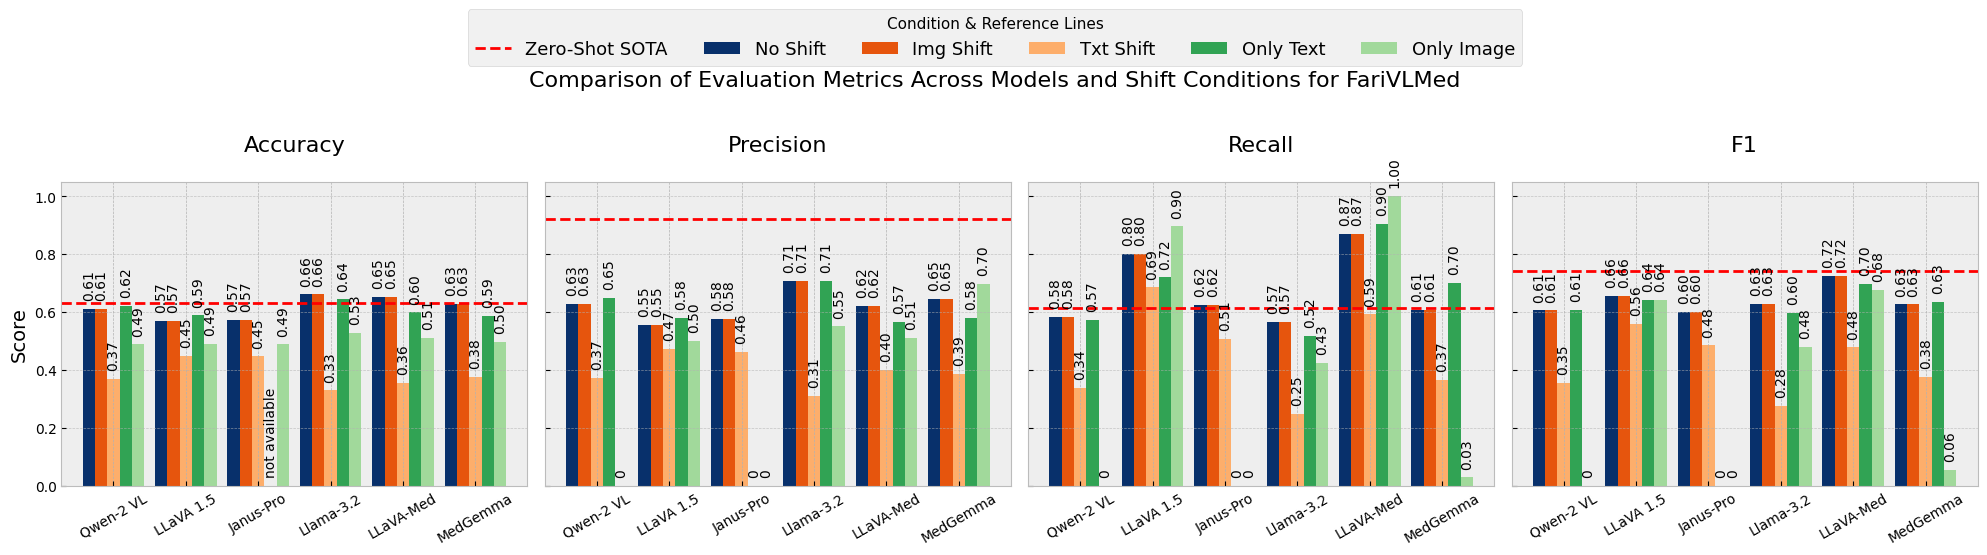

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use a clean style for a professional look
plt.style.use('bmh')

# Sample data (replace with your actual computed values)
models = ["Qwen-2 VL", "LLaVA 1.5", "Janus-Pro", "Llama-3.2", "LLaVA-Med", "MedGemma"]
shifts = ["No Shift", "Img Shift", "Txt Shift", "Only Text", "Only Image"]
metrics = ["Accuracy", "Precision", "Recall", "F1"]

# Data structure: {model: {shift: {metric: value}}} with actual MIMIC values
data

# Compute F1 for each model/shift from Precision and Recall
for model in data:
    for shift in data[model]:
        p = data[model][shift]["Precision"]
        r = data[model][shift]["Recall"]
        if np.isnan(p) or np.isnan(r):
            data[model][shift]["F1"] = np.nan
        elif (p + r == 0):
            data[model][shift]["F1"] = 0
        else:
            data[model][shift]["F1"] = 2 * p * r / (p + r)

# Define zero-shot and in-context SOTA values (converted to decimals)
# Harvard-FairVLMed:
SOTA_zero_shot = {"Accuracy": 0.6303, "Precision": 0.9213, "Recall": 0.6146, "F1": 0.7411}
SOTA_in_context = {"Accuracy": 0.8712, "Precision": 0.9357, "Recall": 0.9669, "F1": 0.9289}


# Define colors for bar groups
shift_colors = {
    "No Shift": "#08306B",
    "Img Shift": "#E6550D",
    "Txt Shift": "#FDAE6B",
    "Only Text": "#31A354",
    "Only Image": "#A1D99B"
}

fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axs[idx]
    x = np.arange(len(models))
    width = 0.17  # Width of each bar

    # Plot bars for each shift condition
    for i, shift in enumerate(shifts):
        values = [data[model][shift][metric] for model in models]
        bars = ax.bar(x + i * width, values, width, label=shift, color=shift_colors[shift])
        
        # Annotate bars
        for bar in bars:
            yval = bar.get_height()
            if np.isnan(yval):
                label_text = "not available"
                yval = 0.0
            elif yval == 0:
                label_text = "0"
            else:
                label_text = f"{yval:.2f}"
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.03, label_text, 
                    ha='center', va='bottom', fontsize=10, rotation=90)

    # Add horizontal lines for zero-shot and in-context SOTA
    ax.axhline(y=SOTA_zero_shot[metric], color='red', linestyle='--', label='Zero-Shot SOTA')
    #ax.axhline(y=SOTA_in_context[metric], color='green', linestyle=':', label='In-Context SOTA')

    ax.set_xticks(x + (len(shifts) - 1) * width / 2)
    ax.set_xticklabels(models, fontsize=10, rotation=30)
    ax.set_title(metric, fontsize=16, pad=22)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if idx == 0:
        ax.set_ylabel("Score", fontsize=14)

# Extract handles and labels from the last subplot to combine into a single legend
handles1, labels1 = axs[-1].get_legend_handles_labels()
# Some handles will be duplicates from repeated axhline calls; use dict to preserve unique order
unique = dict(zip(labels1, handles1))
fig.legend(unique.values(), unique.keys(),
           title="Condition & Reference Lines",
           loc='upper center', ncol=2 + len(shifts),
           fontsize=13, title_fontsize=11, bbox_to_anchor=(0.5, 1.12))

fig.suptitle("Comparison of Evaluation Metrics Across Models and Shift Conditions for FariVLMed", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("images/metrics_vlmed_sota.png", bbox_inches="tight", dpi=300)
plt.show()

### Negative flip rate

In [3]:
from src.test import compute_nfr_all_models, plot_nfr_heatmap

# Define model list
model_dict = {
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    #"google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b",
    
    #"PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_llava_v1",
    "google/medgemma-4b-it": 'medgemma'
}

nfr_matrix = compute_nfr_all_models(model_dict,
                                    results_dir="results",
                                    dataset="medeval",
                                    id="filename")


In [4]:
nfr_matrix

Shift,Image,Text,Only Text,Only Image
qwen2_vl_7b,0.0,0.387000,0.036000,0.299000
llava_1_5_7b,0.0,0.252000,0.058000,0.190500
janus_pro_7b,0.0,0.324500,NaN,0.319000
llama3_10b,0.0,0.444372,0.060606,0.279017
llava_med_llava_v1,0.0,0.363547,0.065080,0.193842
medgemma,0.0,0.388000,0.091500,0.304500


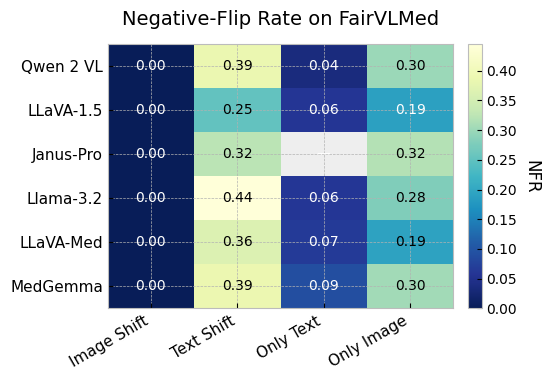

In [5]:
pretty_names = {
    "qwen2_vl_7b":        "Qwen 2 VL",
    "llava_1_5_7b":       "LLaVA-1.5",
    "paligemma2_10b":     "PaliGemma-2",
    "janus_pro_7b":       "Janus-Pro",
    "biomedgpt":          "BiomedGPT",
    "llava_med_llava_v1": "LLaVA-Med",
    "medgemma":           "MedGemma",
    "llama3_10b":         "Llama-3.2",
}

plot_nfr_heatmap(nfr_matrix,
                 dataset_name="FairVLMed",
                 model_name_map=pretty_names,
                 save_path="images/nfr_fairvlmed_heatmap.png")


### First Token

In [ ]:
from src.test import calculate_metrics_all_models

# Define model list 
model_dict = {
    #"Qwen/Qwen2-VL-2B-Instruct": "qwen2_vl_2b",
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    #"google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b",
    #"PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_llava_v1",
    "google/medgemma-4b-it": 'medgemma',
}

data = calculate_metrics_all_models(model_dict, results_dir='results', dataset="medeval", subgroup_variables=[], counterfactual=True, first_token=True, confusion_matrix=False, show_unknown_responses=False, p_yes=False, calibration=True)

### P(Yes)

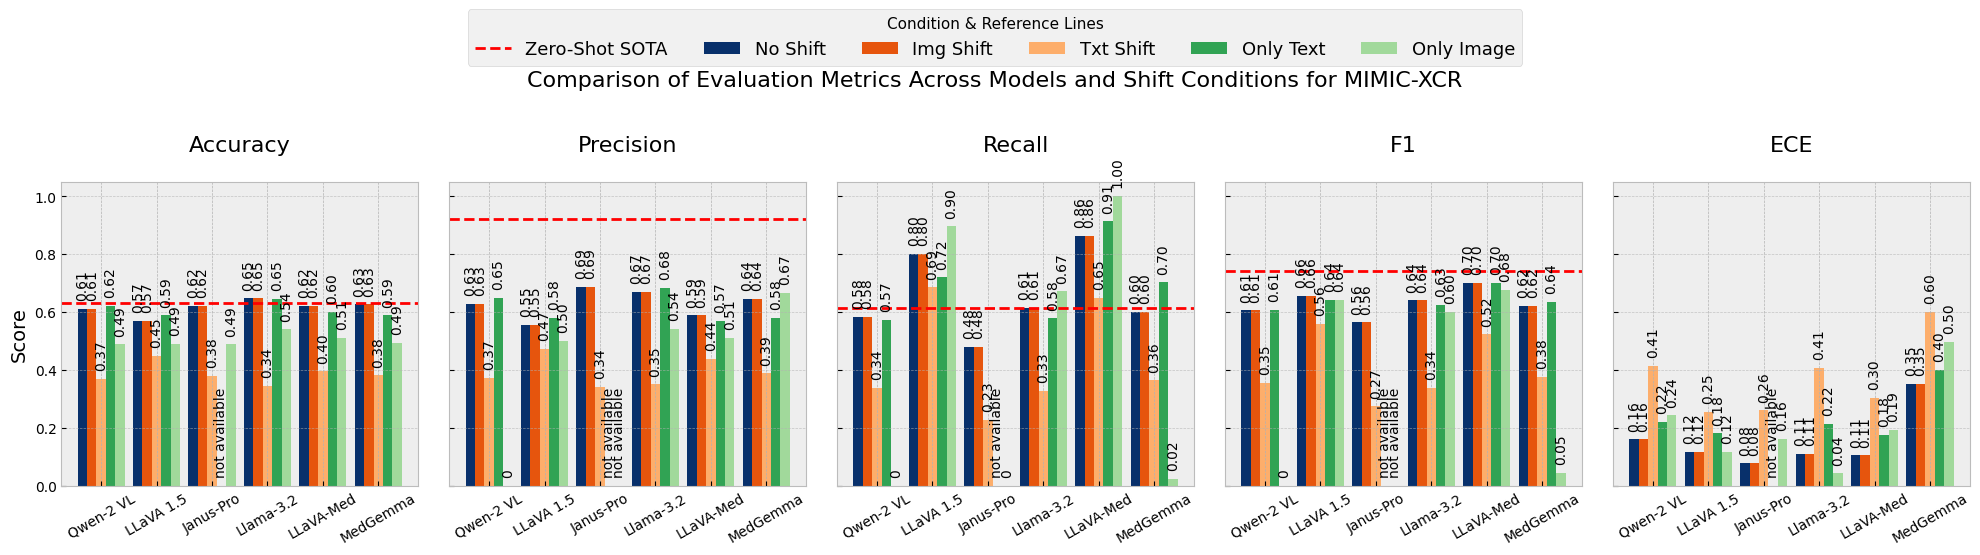

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use a clean style for a professional look
plt.style.use('bmh')

# Sample data (replace with your actual computed values)
models = ["Qwen-2 VL", "LLaVA 1.5", "Janus-Pro", "Llama-3.2", "LLaVA-Med", "MedGemma"]
shifts = ["No Shift", "Img Shift", "Txt Shift", "Only Text", "Only Image"]
metrics = ["Accuracy", "Precision", "Recall", "F1", "ECE"]

# Data structure: {model: {shift: {metric: value}}} with actual MIMIC values
data

# Compute F1 for each model/shift from Precision and Recall
for model in data:
    for shift in data[model]:
        p = data[model][shift]["Precision"]
        r = data[model][shift]["Recall"]
        if np.isnan(p) or np.isnan(r):
            data[model][shift]["F1"] = np.nan
        elif (p + r == 0):
            data[model][shift]["F1"] = 0
        else:
            data[model][shift]["F1"] = 2 * p * r / (p + r)

# Define zero-shot and in-context SOTA values (converted to decimals)
# Harvard-FairVLMed:
SOTA_zero_shot = {"Accuracy": 0.6303, "Precision": 0.9213, "Recall": 0.6146, "F1": 0.7411, "ECE": np.nan}
SOTA_in_context = {"Accuracy": 0.8712, "Precision": 0.9357, "Recall": 0.9669, "F1": 0.9289, "ECE": np.nan}


# Define colors for bar groups
shift_colors = {
    "No Shift": "#08306B",
    "Img Shift": "#E6550D",
    "Txt Shift": "#FDAE6B",
    "Only Text": "#31A354",
    "Only Image": "#A1D99B"
}

fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axs[idx]
    x = np.arange(len(models))
    width = 0.17  # Width of each bar

    # Plot bars for each shift condition
    for i, shift in enumerate(shifts):
        values = [data[model][shift][metric] for model in models]
        bars = ax.bar(x + i * width, values, width, label=shift, color=shift_colors[shift])
        
        # Annotate bars
        for bar in bars:
            yval = bar.get_height()
            if np.isnan(yval):
                label_text = "not available"
                yval = 0.0
            elif yval == 0:
                label_text = "0"
            else:
                label_text = f"{yval:.2f}"
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.03, label_text, 
                    ha='center', va='bottom', fontsize=10, rotation=90)

    # Add horizontal lines for zero-shot and in-context SOTA
    ax.axhline(y=SOTA_zero_shot[metric], color='red', linestyle='--', label='Zero-Shot SOTA')
    #ax.axhline(y=SOTA_in_context[metric], color='green', linestyle=':', label='In-Context SOTA')

    ax.set_xticks(x + (len(shifts) - 1) * width / 2)
    ax.set_xticklabels(models, fontsize=10, rotation=30)
    ax.set_title(metric, fontsize=16, pad=22)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if idx == 0:
        ax.set_ylabel("Score", fontsize=14)

# Extract handles and labels from the last subplot to combine into a single legend
handles1, labels1 = axs[-1].get_legend_handles_labels()
# Some handles will be duplicates from repeated axhline calls; use dict to preserve unique order
unique = dict(zip(labels1, handles1))
fig.legend(unique.values(), unique.keys(),
           title="Condition & Reference Lines",
           loc='upper center', ncol=2 + len(shifts),
           fontsize=13, title_fontsize=11, bbox_to_anchor=(0.5, 1.12))

fig.suptitle("Comparison of Evaluation Metrics Across Models and Shift Conditions for MIMIC-XCR", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("images/metrics_vlmed_sota_p_Yes_sota.png", bbox_inches="tight", dpi=300)
plt.show()

In [3]:
from src.test import compute_nfr_all_models, plot_nfr_heatmap

# Define model list
model_dict = {
    "Qwen/Qwen2-VL-7B-Instruct": "qwen2_vl_7b",
    "llava-hf/llava-1.5-7b-hf": "llava_1_5_7b",
    #"llava-hf/llava-v1.6-mistral-7b-hf": "llava_1_6_mistral",
    #"llava-hf/llava-v1.6-vicuna-7b-hf": "llava_1_6_vicuna",
    #"llava-hf/llama3-llava-next-8b-hf": "llama3_llava_8b",
    #"google/paligemma2-10b-pt-224": 'paligemma2_10b',
    #"google/paligemma2-3b-pt-22": 'paligemma2_3b',
    "deepseek-ai/Janus-Pro-7B": 'janus_pro_7b',
    "meta-llama/Llama-3.2-11B-Vision-Instruct": "llama3_10b",
    
    #"PanaceaAI/BiomedGPT-Base-Pretrained": "biomedgpt",
    "microsoft/llava-med-v1.5-mistral-7b": "llava_med_llava_v1",
    "google/medgemma-4b-it": 'medgemma'
}

nfr_matrix = compute_nfr_all_models(model_dict,
                                    results_dir="results",
                                    dataset="medeval",
                                    id="filename", 
                                   first_token=True,
                                   p_yes=False)


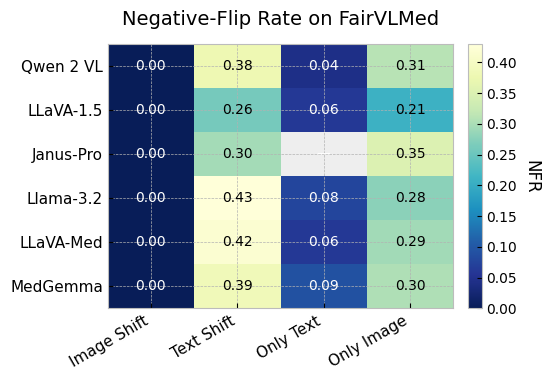

In [4]:
pretty_names = {
    "qwen2_vl_7b":        "Qwen 2 VL",
    "llava_1_5_7b":       "LLaVA-1.5",
    "paligemma2_10b":     "PaliGemma-2",
    "janus_pro_7b":       "Janus-Pro",
    "biomedgpt":          "BiomedGPT",
    "llava_med_llava_v1": "LLaVA-Med",
    "medgemma":           "MedGemma",
    "llama3_10b":         "Llama-3.2",
}

plot_nfr_heatmap(nfr_matrix,
                 dataset_name="FairVLMed",
                 model_name_map=pretty_names,
                 save_path="images/nfr_fairvlmed_heatmap_p_Yes.png")
